In [1]:
from PIL import Image, ImageFilter , ImageEnhance 

### Cropping Image

In [2]:
with Image.open("leaves.jpg") as img:
    
    width, height = img.size
    
    if width < height:
        newWidth = 512
        newHeight = int(height * (512/width))
        cropTop = int((newHeight - 512)/2)
        cropBottom = cropTop + 512
        crop = (0, cropTop, 512, cropBottom)
    else:
        newHeight = 512
        newWidth = int(width * (512/height))
        cropLeft = int((newWidth - 512)/2)
        cropRight = cropLeft + 512
        crop = (cropLeft, 0, cropRight, 512)
        
    imgResize = img.resize((newWidth, newHeight))
    imCrop = imgResize.crop(crop)
    imCrop.save("newleaves.jpg")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

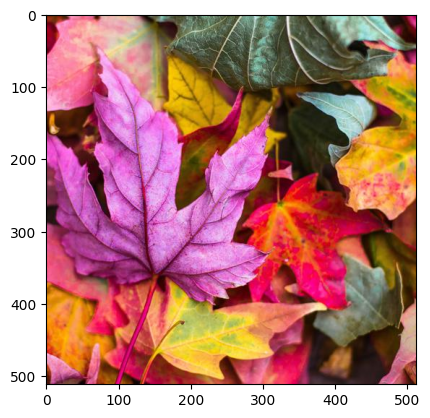

In [4]:
image = plt.imread("newleaves.jpg")
plt.imshow(image);

### GrayScale Image

In [5]:
def rgb2gray(img):
    height, width = len(img), len(img[0])
    
    gray_img = np.empty([height, width])
    
    for i in range(height):
        for j in range(width):
            gray_img[i][j] = int((img[i][j][0] * 0.299  + img[i][j][1] * 0.587  + img[i][j][2] * 0.114))
            
    return gray_img

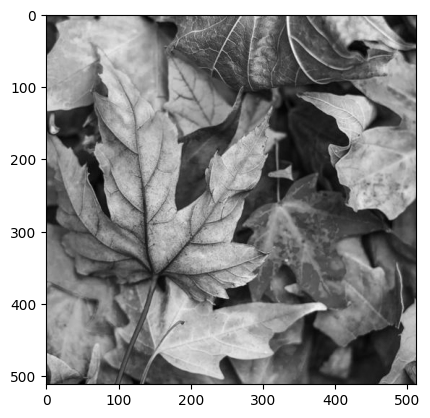

In [6]:
grayscale_img = rgb2gray(image)
plt.imshow(grayscale_img, cmap = 'gray');

### Negtaive Image

In [7]:
def rgb2negative(img):
    height, width = len(img), len(img[0])
    
    negative_img = img.copy()
    
    for i in range(height):
        for j in range(width):
            negative_img[i][j][0] = 255 - img[i][j][0]
            negative_img[i][j][1] = 255 - img[i][j][1]
            negative_img[i][j][2] = 255 - img[i][j][2]
            
    return negative_img

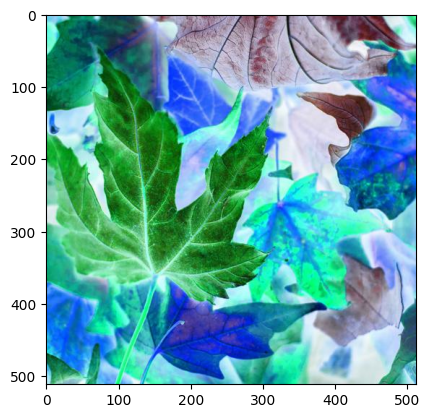

In [8]:
negative_img = rgb2negative(image)
plt.imshow(negative_img);

### Red Filter Image

In [9]:
def show_redness(img):
    height, width = len(img), len(img[0])
    
    new_img = img.copy()
    
    for i in range(height):
        for j in range(width):
            # new_img[i][j][0] = max(factor* img[i][j][0], img[i][j][0])
            new_img[i][j][1] = 0
            new_img[i][j][2] = 0
            
    return new_img

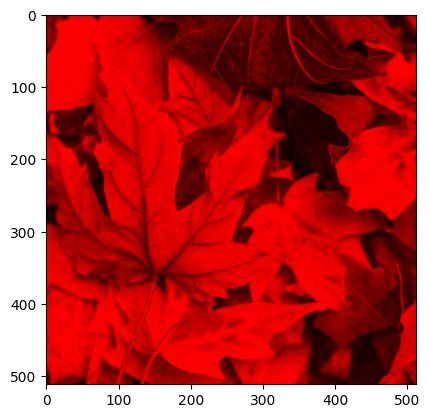

In [10]:
red_img = show_redness(image)
plt.imshow(red_img);

### Green Filter Image

In [11]:
def show_greenness(img):
    height, width = len(img), len(img[0])
    
    new_img = img.copy()
    
    for i in range(height):
        for j in range(width):
            new_img[i][j][0] = 0
            new_img[i][j][2] = 0
            
    return new_img

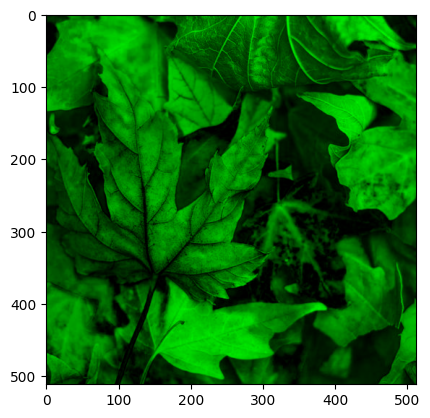

In [12]:
green_img = show_greenness(image)
plt.imshow(green_img);

### Blue Filter Image

In [13]:
def show_blueness(img):
    height, width = len(img), len(img[0])
    
    new_img = img.copy()
    
    for i in range(height):
        for j in range(width):
            new_img[i][j][0] = 0
            new_img[i][j][1] = 0
            
    return new_img

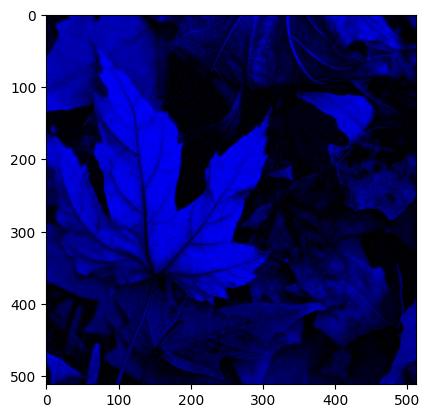

In [14]:
blue_img = show_blueness(image)
plt.imshow(blue_img);

### Invert in X direction

In [23]:

def invertX(img):
    height, width = len(img), len(img[0])
    
    new_img = img.copy()
    
    for i in range(height):
        for j in range(width//2):
            new_img[i][width-j-1][0], new_img[i][j][0] = new_img[i][j][0], new_img[i][width - j - 1][0]
            new_img[i][width-j-1][1], new_img[i][j][1] = new_img[i][j][1], new_img[i][width - j - 1][1]
            new_img[i][width-j-1][2], new_img[i][j][2] = new_img[i][j][2], new_img[i][width - j - 1][2]
            
    return new_img


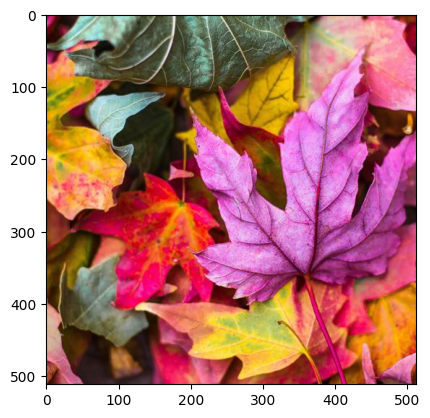

In [27]:
x_inverted_img = invertX(image)
plt.imshow(x_inverted_img);

### Invert in Y direction

In [25]:

def invertY(img):
    height, width = len(img), len(img[0])
    
    new_img = img.copy()
    
    for i in range(height//2):
        for j in range(width):
            new_img[height - i-1][j][0], new_img[i][j][0] = new_img[i][j][0], new_img[height - i-1][j][0]
            new_img[height - i-1][j][1], new_img[i][j][1] = new_img[i][j][1], new_img[height - i-1][j][1]
            new_img[height - i-1][j][2], new_img[i][j][2] = new_img[i][j][2], new_img[height - i-1][j][2]
            
    return new_img

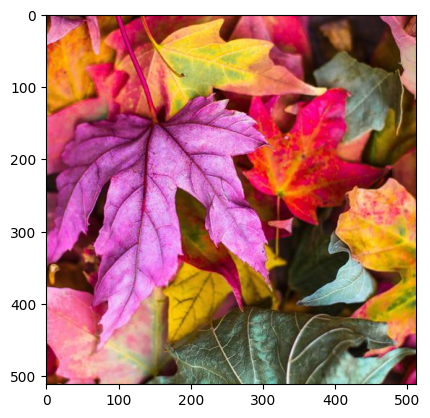

In [26]:
y_inverted_img = invertY(image)
plt.imshow(y_inverted_img);

### Blurred Image

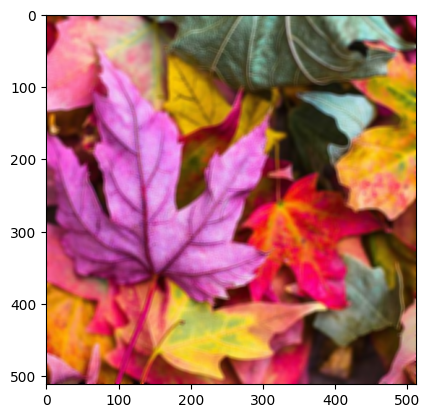

In [19]:
img = Image.open("newleaves.jpg")
blurred_img = img.filter(ImageFilter.BLUR)
plt.imshow(blurred_img);


### Increase Brightness in Image

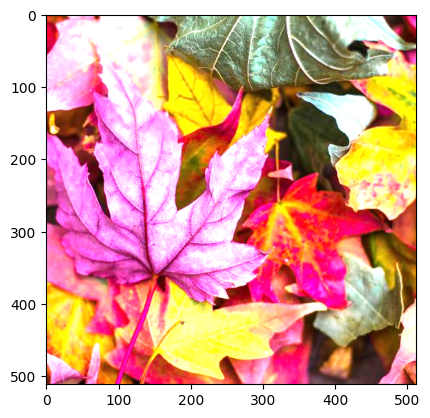

In [17]:
bright_image = ImageEnhance.Brightness(img).enhance(1.6)
plt.imshow(bright_image);

### Increase Sharpness of an Image

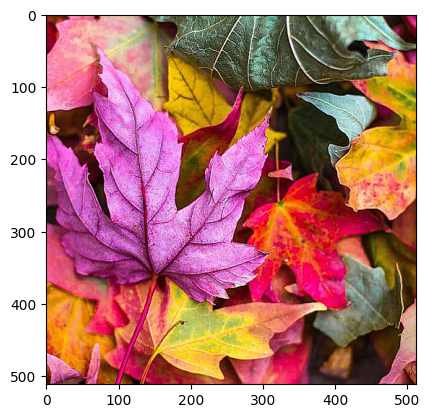

In [18]:
sharp_image = ImageEnhance.Sharpness(img).enhance(4)
plt.imshow(sharp_image);